In [2]:
# import libraries

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
import plotly.express as px
import missingno as msno
import country_converter as coco

In [3]:
# read file
df = pd.read_csv('/Users/mac/Desktop/Data Analysis/ds_salaries.csv')
print(df)

     Unnamed: 0  work_year experience_level employment_type  \
0             0       2020               MI              FT   
1             1       2020               SE              FT   
2             2       2020               SE              FT   
3             3       2020               MI              FT   
4             4       2020               SE              FT   
..          ...        ...              ...             ...   
602         602       2022               SE              FT   
603         603       2022               SE              FT   
604         604       2022               SE              FT   
605         605       2022               SE              FT   
606         606       2022               MI              FT   

                      job_title  salary salary_currency  salary_in_usd  \
0                Data Scientist   70000             EUR          79833   
1    Machine Learning Scientist  260000             USD         260000   
2             Big Dat

In [4]:
# Replacing some values

df.company_size.replace(['L','M','S'],['Large','Medium','Small'],inplace=True)

In [5]:
# info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [6]:
# first 5

df.tail()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,Medium
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,Medium
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,Medium
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,Medium
606,606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,Large


In [7]:
# last 5
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,Large
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,Small
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,Medium
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,Small
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,Large


In [8]:
print(df.isnull().sum())

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


Text(0.5, 1.0, 'Missing values')

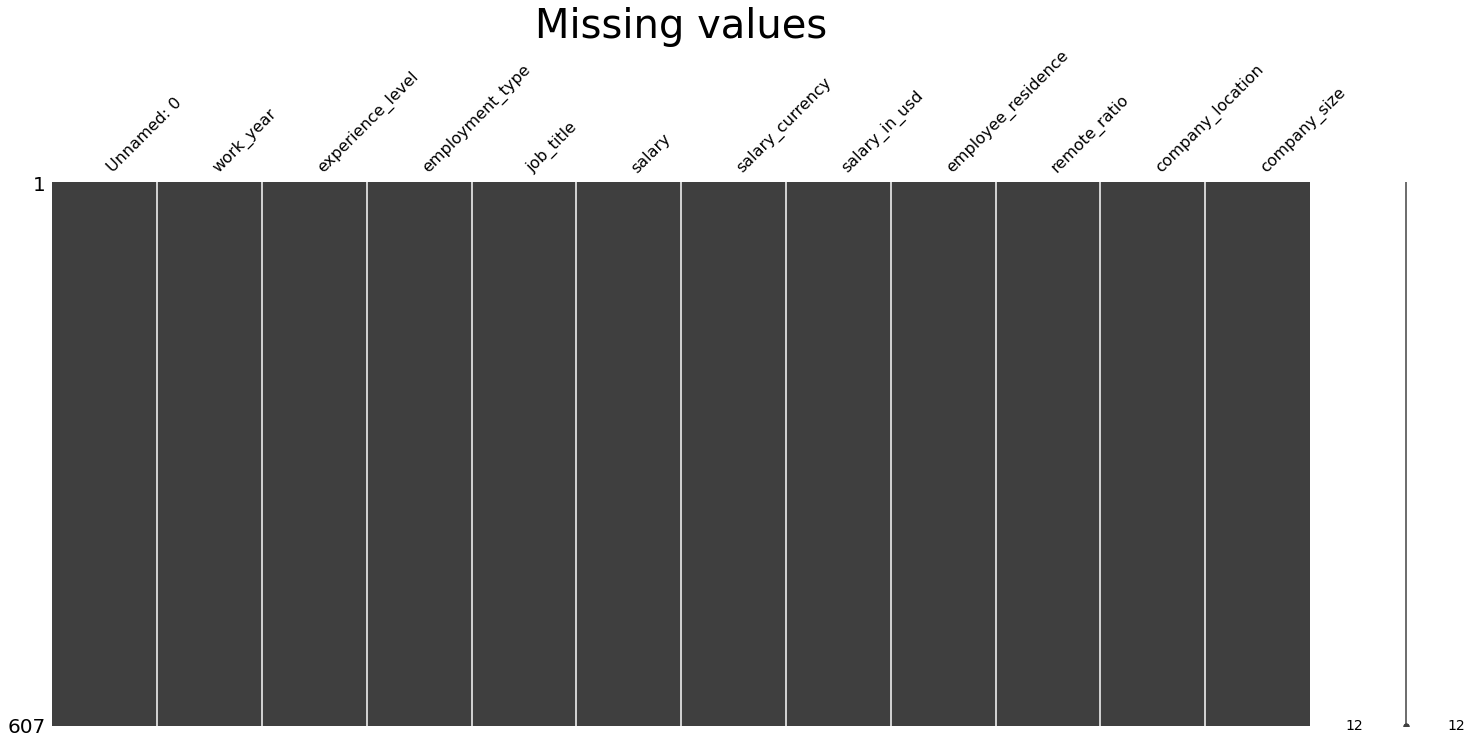

In [9]:
# plot null values

msno.matrix(df)
plt.title('Missing values', fontsize = 40)

In [10]:
# columns

df.keys()

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [11]:
# calculations

df['experience_level'].value_counts()


SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

In [12]:
# total sum
df['salary'].sum()

196668038

In [13]:
# min salary 

df['salary'].min()

4000

In [14]:
# maximum salary paid 

df['salary'].max()


30400000

In [15]:
value = df['job_title'].value_counts()
print(value)

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

In [16]:
df['company_size'].value_counts()


Medium    326
Large     198
Small      83
Name: company_size, dtype: int64

In [17]:
# employment types
df['employment_type'].value_counts()

FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

In [18]:
df['company_location'].value_counts()

US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
AT      4
PT      4
PL      4
LU      3
PK      3
BR      3
AE      3
MX      3
AU      3
TR      3
DK      3
IT      2
CZ      2
SI      2
RU      2
CH      2
NG      2
CN      2
BE      2
VN      1
EE      1
AS      1
DZ      1
MY      1
MD      1
KE      1
SG      1
CO      1
IR      1
CL      1
MT      1
IL      1
UA      1
IQ      1
RO      1
HR      1
NZ      1
HU      1
HN      1
IE      1
Name: company_location, dtype: int64

In [19]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


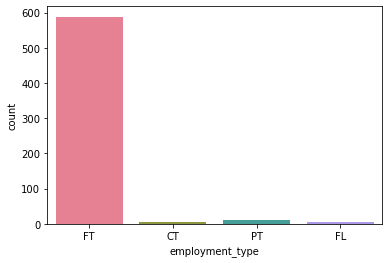

<Figure size 1008x648 with 0 Axes>

In [20]:
# plot countplot of employment type

sns.countplot(x=df['employment_type'], palette = 'husl')
plt.figure(figsize=(14,9))
plt.show()

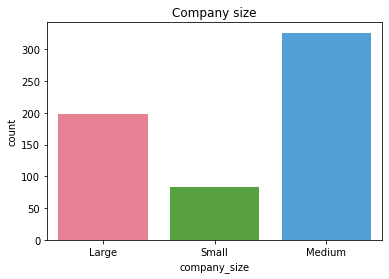

<Figure size 1008x648 with 0 Axes>

In [21]:
# countplot of company size

sns.countplot(x=df['company_size'],palette = 'husl')
plt.title('Company size')
plt.figure(figsize=(14,9))
plt.show()

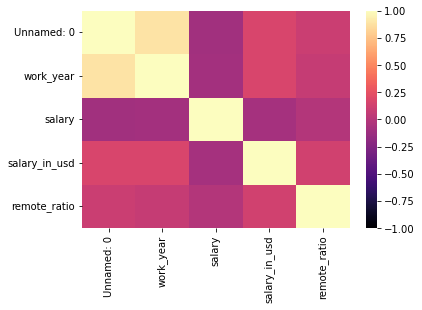

In [22]:
# correlation analysis

correlation = df.corr()
sns.heatmap(vmin = -1.0, vmax = 1.0 , data= correlation , cmap='magma')
plt.show()

In [23]:
# group jobs in descending order

group = df.groupby('job_title').size().reset_index().sort_values(by=0,ascending=False)
print(group)

                                   job_title    0
22                            Data Scientist  143
17                             Data Engineer  132
12                              Data Analyst   97
38                 Machine Learning Engineer   41
48                        Research Scientist   16
21                      Data Science Manager   12
16                            Data Architect   11
7                          Big Data Engineer    8
41                Machine Learning Scientist    8
25                  Director of Data Science    7
1                               AI Scientist    7
46                  Principal Data Scientist    7
19                   Data Science Consultant    7
15                    Data Analytics Manager    7
10                  Computer Vision Engineer    6
5                            BI Data Analyst    6
36                               ML Engineer    6
33                        Lead Data Engineer    6
18                  Data Engineering Manager    5


In [24]:
# Top 5 jobs
group.head()

,job_title,0
22,Data Scientist,143
17,Data Engineer,132
12,Data Analyst,97
38,Machine Learning Engineer,41
48,Research Scientist,16


In [25]:
# Jobs

group.tail()

,job_title,0
27,Finance Data Analyst,1
23,Data Specialist,1
14,Data Analytics Lead,1
6,Big Data Architect,1
49,Staff Data Scientist,1


In [73]:
# Top 10 jobs
fig = px.pie(group[:10],values=0, names='job_title', title ='Top 10 Jobs by Volume')
fig.show()

In [27]:
exp = df.groupby(['job_title','experience_level']).size()
expe = exp.unstack()
print(expe)

experience_level                            EN   EX    MI    SE
job_title                                                      
3D Computer Vision Researcher              NaN  NaN   1.0   NaN
AI Scientist                               4.0  NaN   2.0   1.0
Analytics Engineer                         NaN  2.0   NaN   2.0
Applied Data Scientist                     1.0  NaN   2.0   2.0
Applied Machine Learning Scientist         1.0  NaN   3.0   NaN
BI Data Analyst                            2.0  1.0   3.0   NaN
Big Data Architect                         NaN  NaN   NaN   1.0
Big Data Engineer                          3.0  NaN   3.0   2.0
Business Data Analyst                      2.0  NaN   3.0   NaN
Cloud Data Engineer                        NaN  NaN   1.0   1.0
Computer Vision Engineer                   3.0  NaN   NaN   3.0
Computer Vision Software Engineer          2.0  NaN   1.0   NaN
Data Analyst                              12.0  2.0  29.0  54.0
Data Analytics Engineer                 

In [74]:
# Finding out how experience relates to Jobs
fig= px.bar(df, x = df['job_title'], y=df['experience_level'], color='experience_level', width=1000 , height=1000 , title='Bar chart showing Experience level in relation to jobs')
fig.show()

In [75]:

#Data Science jobs using T
jobs= px.treemap(df,path=['job_title'],title="Data Science Jobs by Count")
jobs.show()

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [31]:
# Currencies by Count
fig= px.histogram(x=df['salary_currency'],color=df['salary_currency'],barmode='stack', title='Currencies by Count')
fig.show()

In [71]:
# job type and company size by count

fig = px.sunburst(df, path=['job_title','company_size'], color='company_size', title='Sunburst showing job titles by company size'
)
fig.update_layout(margin = dict(t=30, l=20, r=20, b=40))
fig.show()

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



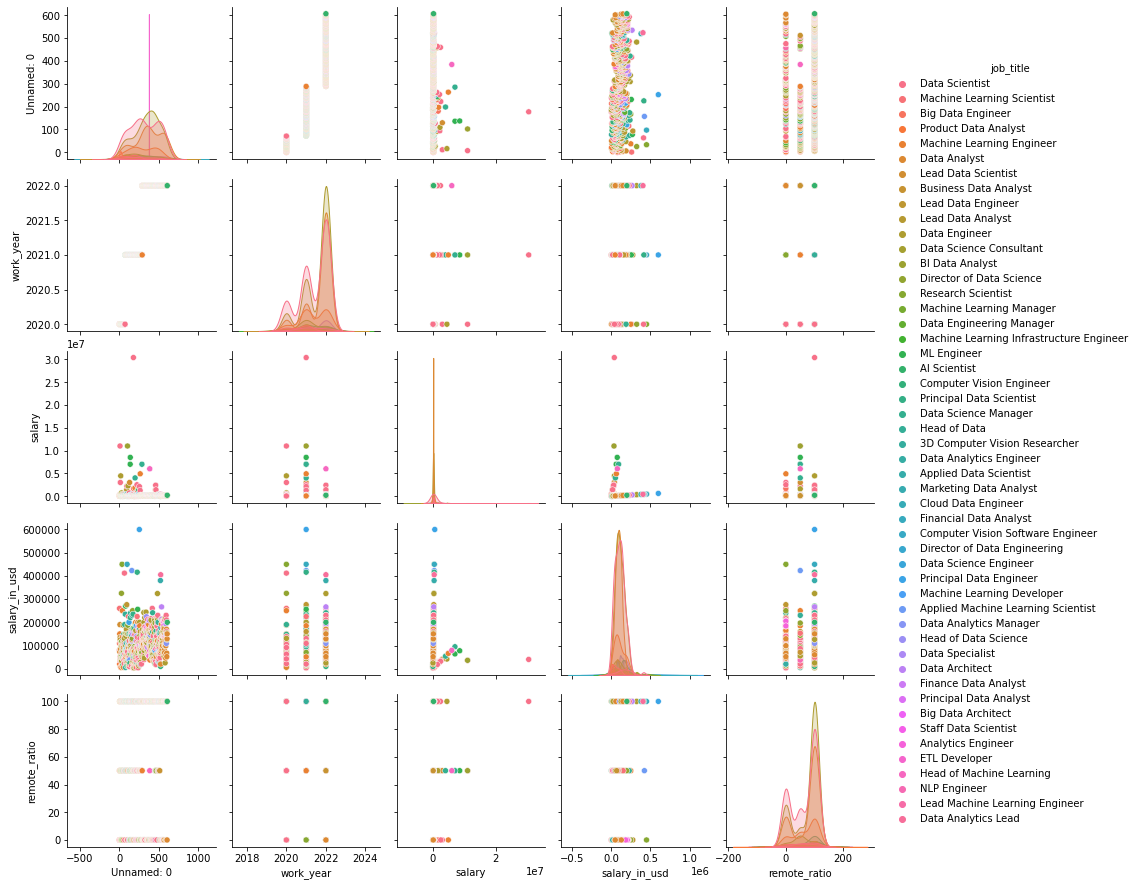

In [62]:


sns.pairplot(df , hue = 'job_title')
plt.show()

In [40]:
# top places where people are hired
top_res = df['employee_residence'].value_counts()[:10]
print(top_res)

USA    332
GBR     44
IND     30
CAN     29
DEU     25
FRA     18
ESP     15
GRC     13
JPN      7
PRT      6
Name: employee_residence, dtype: int64


In [49]:
# top jobs

top_job = df['job_title'].value_counts()[:10]
print(top_job)

Data Scientist                143
Data Engineer                 132
Data Analyst                   97
Machine Learning Engineer      41
Research Scientist             16
Data Science Manager           12
Data Architect                 11
Big Data Engineer               8
Machine Learning Scientist      8
Principal Data Scientist        7
Name: job_title, dtype: int64


In [48]:
# top company locations people work at in the data space
top_loc = df['company_location'].value_counts()[:10]
print(top_loc)

US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
Name: company_location, dtype: int64


In [43]:
# use converter to convert column to countries

converted = coco.convert(names=df['employee_residence'], to ='ISO3')
df['employee_residence'] = converted


In [47]:

residence = df['employee_residence'].value_counts()


In [38]:
# plot map in relation to data science jobs

fig = px.choropleth(locations=residence.index,color=residence.values , title= 'Data science jobs by Location' )

fig.update_layout(font = dict(size= 17, family="Franklin Gothic"))
fig.show()